In [5]:
!rm -rf train

In [6]:
!wget https://www.dropbox.com/s/iiwnl19ww3b12k3/train.zip?dl=0

--2022-06-04 11:22:24--  https://www.dropbox.com/s/iiwnl19ww3b12k3/train.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:6018:18::a27d:312
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/iiwnl19ww3b12k3/train.zip [following]
--2022-06-04 11:22:25--  https://www.dropbox.com/s/raw/iiwnl19ww3b12k3/train.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc296abdf1bfa561888744fdf614.dl.dropboxusercontent.com/cd/0/inline/BmjSJAwCDaWAVKTIZ3m4DeNbo3irTG1sw14at8y3JpAZaeqRWelyvvWQlD9PkQHqZG__H08K6PcVt9Xzb9eQXZ71DS4pAZaWj8L-G80SZWOyYkr4Mg3MMaNKg0zeTJr-ckHdnGiznCt0MwzQsFqdH2dz37nU6fAMd91XUI0hN1oGdQ/file# [following]
--2022-06-04 11:22:25--  https://uc296abdf1bfa561888744fdf614.dl.dropboxusercontent.com/cd/0/inline/BmjSJAwCDaWAVKTIZ3m4DeNbo3irTG1sw14at8y3JpAZaeqRWelyvvWQlD9PkQHqZG__H08K

In [7]:
!unzip train.zip?dl=0

Archive:  train.zip?dl=0
   creating: train/
   creating: train/Sad/
  inflating: train/Sad/download (1).jpg  
  inflating: train/Sad/download (10).jpg  
  inflating: train/Sad/download (11).jpg  
  inflating: train/Sad/download (16).jpg  
  inflating: train/Sad/download (2).jpg  
  inflating: train/Sad/download (3).jpg  
  inflating: train/Sad/download (4).jpg  
  inflating: train/Sad/download (5).jpg  
  inflating: train/Sad/download (6).jpg  
  inflating: train/Sad/download (7).jpg  
  inflating: train/Sad/download (8).jpg  
  inflating: train/Sad/download (9).jpg  
  inflating: train/Sad/download.jpg  
  inflating: train/Sad/images (1).jpg  
  inflating: train/Sad/images (10).jpg  
  inflating: train/Sad/images (11).jpg  
  inflating: train/Sad/images (12).jpg  
  inflating: train/Sad/images (13).jpg  
  inflating: train/Sad/images (14).jpg  
  inflating: train/Sad/images (15).jpg  
  inflating: train/Sad/images (16).jpg  
  inflating: train/Sad/images (17).jpg  
  inflating: train

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.layers import Flatten, Dense
from keras.models import Model
from keras.preprocessing.image import ImageDataGenerator , img_to_array, load_img
from keras.applications.mobilenet import MobileNet, preprocess_input 
from keras.losses import binary_crossentropy

#  Building our Model to train the data 



In [39]:
# Working with pre-trained model 

base_model = MobileNet(input_shape=(224,224,3), include_top= False, classes=2)

for layer in base_model.layers:
  layer.trainable = False

x = Flatten()(base_model.output)
x = Dense(units=2 , activation='softmax' )(x)

# creating our model.
model = Model(base_model.input, x)
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                                    

In [40]:
model.compile(optimizer='adam', loss= binary_crossentropy , metrics=['accuracy']  )

# Preparing our data using data generator

In [41]:
train_datagen = ImageDataGenerator(
     zoom_range = 0.2, 
     shear_range = 0.2, 
     horizontal_flip=True, 
     rescale = 1./255
)

train_data = train_datagen.flow_from_directory(directory= "/content/train", 
                                               target_size=(224,224), 
                                               batch_size=32,
                                  )


train_data.class_indices

Found 100 images belonging to 2 classes.


{'Happy': 0, 'Sad': 1}

In [42]:
val_datagen = ImageDataGenerator(rescale = 1./255 )

val_data = val_datagen.flow_from_directory(directory= "/content/train", 
                                           target_size=(224,224), 
                                           batch_size=32,
                                  )

Found 100 images belonging to 2 classes.


# Visualising the data that is fed to train data gen

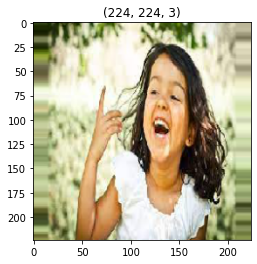

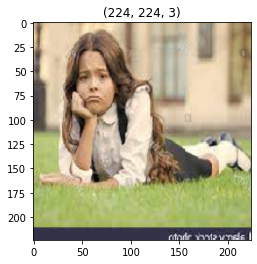

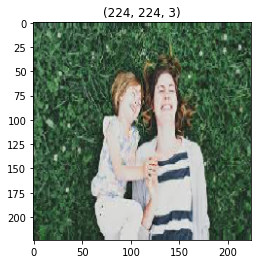

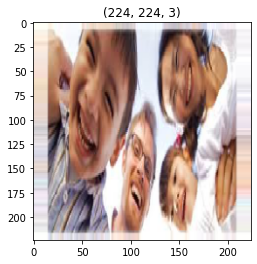

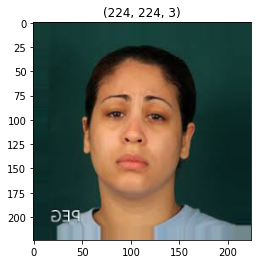

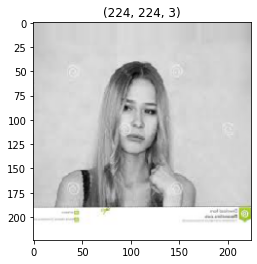

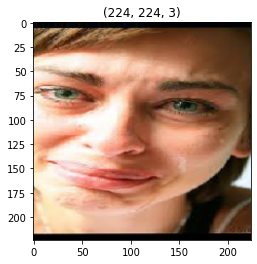

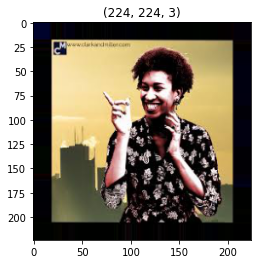

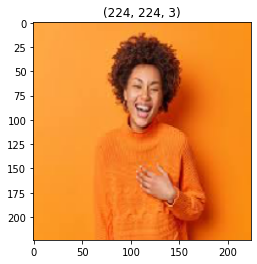

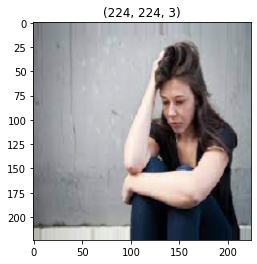

In [43]:
# to visualize the images in the training data generator 

t_img , label = train_data.next()

#-----------------------------------------------------------------------------
# function when called will prot the images 
def plotImages(img_arr, label):
  """
  input  :- images array 
  output :- plots the images 
  """
  count = 0
  for im, l in zip(img_arr,label) :
    plt.imshow(im)
    plt.title(im.shape)
    plt.axis = False
    plt.show()
    
    count += 1
    if count == 10:
      break

#-----------------------------------------------------------------------------
# function call to plot the images 
plotImages(t_img, label)

# early stopping and model check point

In [44]:
## having early stopping and model check point
from keras.callbacks import ModelCheckpoint, EarlyStopping

# early stopping
es = EarlyStopping(monitor='val_accuracy', min_delta= 0.01 , patience= 5, verbose= 1, mode='auto')

# model check point
mc = ModelCheckpoint(filepath="best_model.h5", monitor= 'val_accuracy', verbose= 1, save_best_only= True, mode = 'auto')

# puting call back in a list 
call_back = [es, mc]

In [54]:
hist = model.fit_generator(train_data, 
                           steps_per_epoch= 3, 
                           epochs= 5, 
                           validation_data= val_data, 
                           validation_steps= 4, 
                           callbacks=[es,mc])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/5
3/3 [==============================] - ETA: 0s - loss: 0.8508 - accuracy: 0.8382
Epoch 1: val_accuracy did not improve from 0.91000
3/3 [==============================] - 2s 653ms/step - loss: 0.8508 - accuracy: 0.8382 - val_loss: 0.5559 - val_accuracy: 0.8700
Epoch 2/5
3/3 [==============================] - ETA: 0s - loss: 0.3110 - accuracy: 0.8824
Epoch 2: val_accuracy improved from 0.91000 to 0.98000, saving model to best_model.h5
3/3 [==============================] - 1s 477ms/step - loss: 0.3110 - accuracy: 0.8824 - val_loss: 0.0834 - val_accuracy: 0.9800
Epoch 3/5
3/3 [==============================] - ETA: 0s - loss: 0.2884 - accuracy: 0.9167
Epoch 3: val_accuracy did not improve from 0.98000
3/3 [==============================] - 1s 471ms/step - loss: 0.2884 - accuracy: 0.9167 - val_loss: 0.2352 - val_accuracy: 0.9400
Epoch 4/5
2/3 [===================>..........] - ETA: 0s - loss: 0.1349 - accuracy: 0.9688
Epoch 4: val_accuracy did not improve from 0.98000
3/3 [=====

In [55]:
# Loading the best fit model 
from keras.models import load_model
model = load_model("/content/best_model.h5")

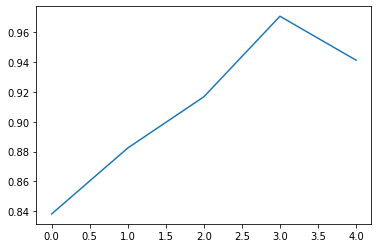

In [57]:
h=hist.history
plt.plot(h['accuracy'])


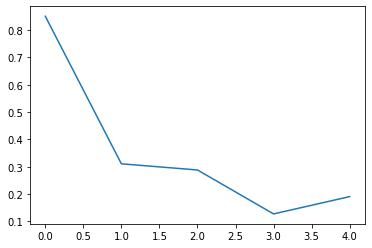

In [58]:
plt.plot(h['loss'])


In [59]:
# just to map o/p values 
op = dict(zip( train_data.class_indices.values(), train_data.class_indices.keys()))
op

{0: 'Happy', 1: 'Sad'}

 the image is of Sad


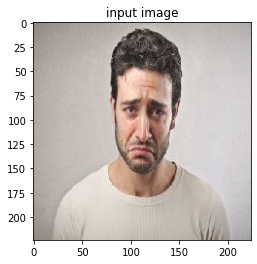

In [60]:
# path for the image to see if it predicts correct class

path = "/content/sadface.jpg"
img = load_img(path, target_size=(224,224))

i = img_to_array(img)/255
input_arr = np.array([i])
input_arr.shape

pred = np.argmax(model.predict(input_arr))

print(f" the image is of {op[pred]}")

# to display the image  
plt.imshow(input_arr[0])
plt.title("input image")
plt.show()